# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

# EDA 

Do EDA for each variable in the data

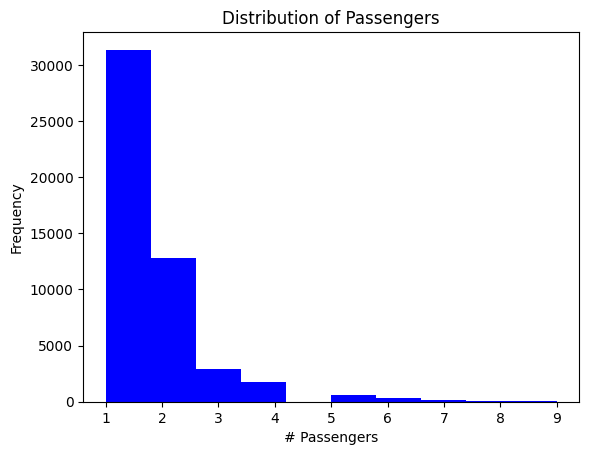

In [9]:
plt.hist(data=df, x="num_passengers", color="blue") 
plt.title("Distribution of Passengers");
plt.ylabel("Frequency")
plt.xlabel("# Passengers");

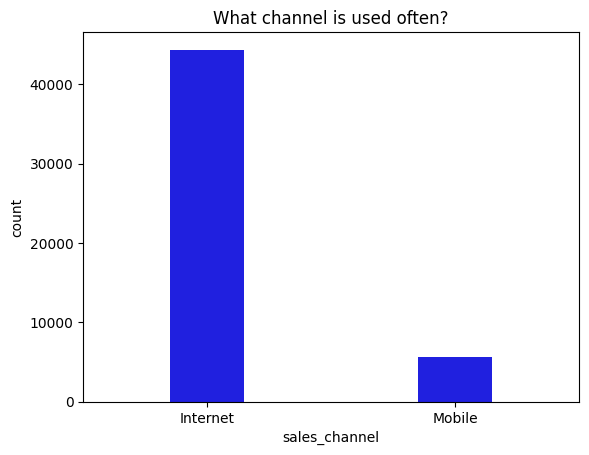

In [10]:
sns.countplot(data=df, x="sales_channel", color="blue", width=0.3).set(title="What channel is used often?");

Passengers prefer the internet than mobile for sales channel

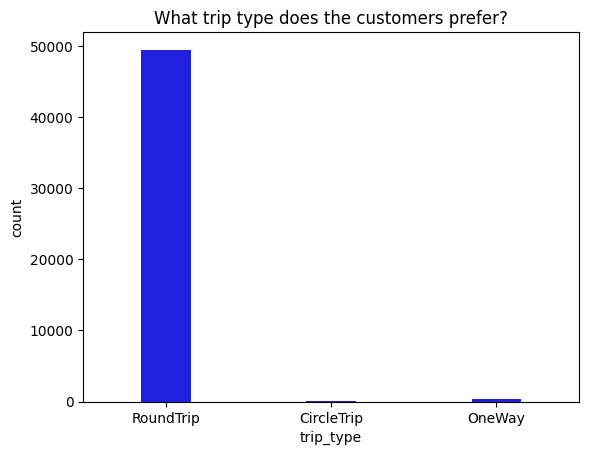

In [11]:
sns.countplot(data=df, x="trip_type", color="blue", width=0.3).set(title="What trip type does the customers prefer?");     

Round trip is more prefered than circle and oneway trip with significant number 

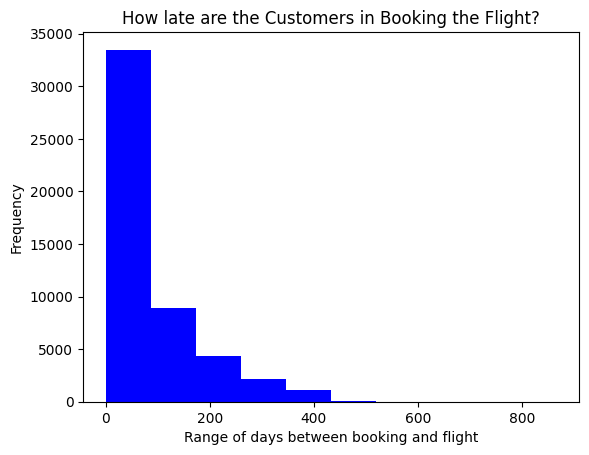

In [12]:
plt.hist(data=df, x="purchase_lead", color="blue") 
plt.title("How late are the Customers in Booking the Flight?");
plt.ylabel("Frequency")
plt.xlabel("Range of days between booking and flight");

Most of passengers like to book flight near the flight date

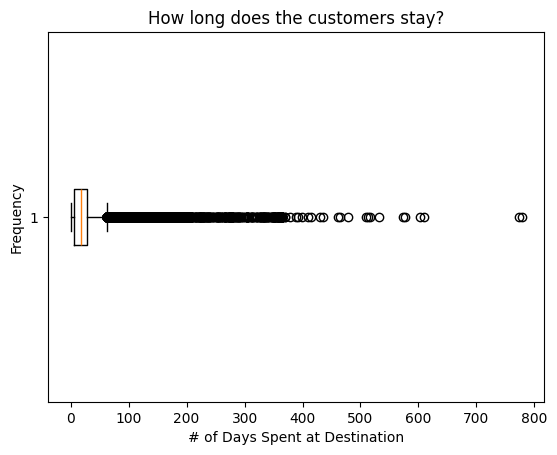

In [41]:
plt.boxplot(data=df, x="length_of_stay", vert=False) 
plt.title("How long does the customers stay?")
plt.ylabel("Frequency")
plt.xlabel("# of Days Spent at Destination");

Many of the passengers stay spend more than 100 days at the destination. There are outlier of 800 days

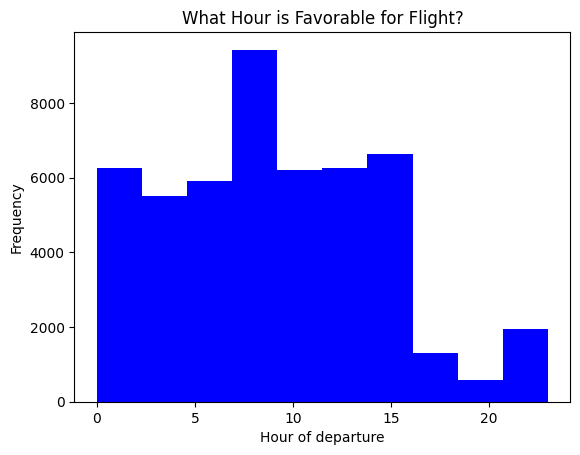

In [66]:
plt.hist(data=df, x="flight_hour", color="blue") 
plt.title("What Hour is Favorable for Flight?");
plt.ylabel("Frequency")
plt.xlabel("Hour of departure");

Most of passengers like to flight under the hour 12 (before midday) 

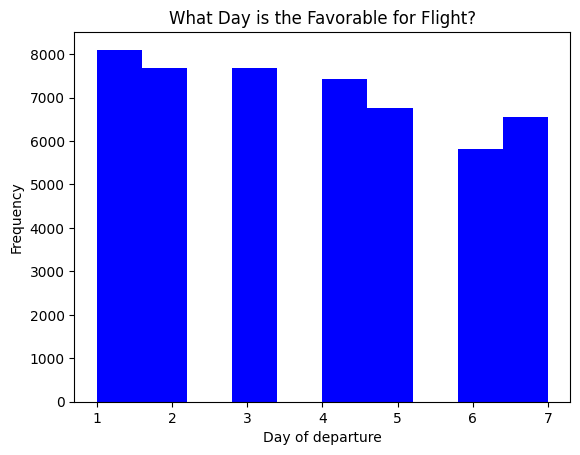

In [67]:
plt.hist(data=df, x="flight_day", color="blue") 
plt.title("What Day is the Favorable for Flight?");
plt.ylabel("Frequency")
plt.xlabel("Day of departure");

Most of the passengers like to travel on weekday (day 1-5/Moday-Friday) than Weekend (Saturday-Sunday)

In [15]:
# split the origin and destination for route 
df["orig_flight"] = df["route"].apply(lambda x:x[:3])
df["dest_flight"] = df["route"].apply(lambda x:x[3:])

# delete the route column 
df = df.drop(columns="route")

In [16]:
df["orig_flight"].unique()

array(['AKL', 'AOR', 'BBI', 'BDO', 'BKI', 'BLR', 'BOM', 'BTJ', 'BTU',
       'BWN', 'CAN', 'CCU', 'CEB', 'CGK', 'CKG', 'CMB', 'CNX', 'COK',
       'CRK', 'CSX', 'CTS', 'CTU', 'CXR', 'DAC', 'DAD', 'DEL', 'DMK',
       'DPS', 'GOI', 'HAN', 'HDY', 'HGH', 'HKG', 'HKT', 'HND', 'HYD',
       'ICN', 'IKA', 'JED', 'JHB', 'JOG', 'KBR', 'KBV', 'KCH', 'KHH',
       'KIX', 'KLO', 'KNO', 'KOS', 'KTM', 'KWL', 'LBU', 'LGK', 'LOP',
       'LPQ', 'MAA', 'MEL', 'MFM', 'MLE', 'MNL', 'MRU', 'MYY', 'NRT',
       'OOL', 'PEK', 'PEN', 'PER', 'PNH', 'PNK', 'PUS', 'PVG', 'REP',
       'RGN', 'SBW', 'SDK', 'SGN', 'SIN', 'SRG', 'SUB', 'SYD', 'TGG',
       'TPE', 'TRZ', 'TWU', 'URT'], dtype=object)

In [17]:
df["dest_flight"].unique()

array(['DEL', 'HGH', 'HND', 'ICN', 'KIX', 'KTM', 'KUL', 'MRU', 'PEK',
       'PVG', 'TPE', 'MEL', 'OOL', 'PER', 'SYD', 'CTS', 'CTU', 'IKA',
       'PUS', 'XIY', 'CKG', 'JED', 'WUH', 'COK', 'DPS', 'JHB', 'KCH',
       'LOP', 'MAA', 'MYY', 'PEN', 'PNH', 'SBW', 'SIN', 'SUB', 'TGG',
       'TRZ', 'TWU', 'DMK', 'HKT', 'KBR', 'KNO', 'LGK', 'SGN', 'KBV',
       'HKG', 'JOG', 'MFM', 'MNL', 'SZX', 'MLE', 'REP', 'RGN', 'SDK',
       'VTZ', 'PDG', 'URT', 'SWA', 'UTP', 'VTE', 'LPQ', 'LBU', 'NRT',
       'SRG'], dtype=object)

Some places between origin are the same as destination 

In [18]:
df["booking_origin"].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

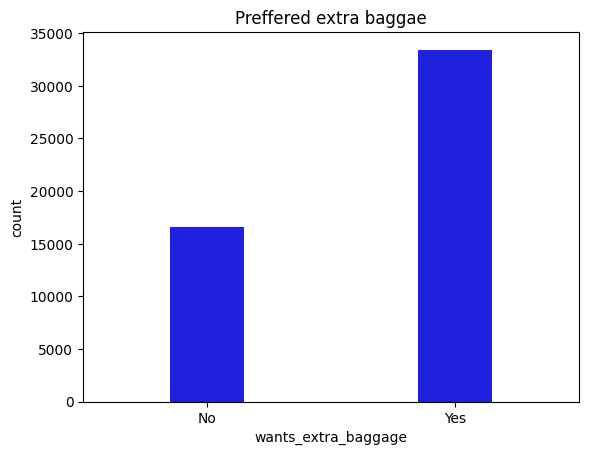

In [55]:
ax = sns.countplot(data=df, x="wants_extra_baggage", color="blue", width=0.3)
ax.set_title("Preffered extra baggae")
ax.set_xticks(range(2)) 
ax.set_xticklabels(["No", "Yes"])
plt.show()

Most of passengers request for extra baggae

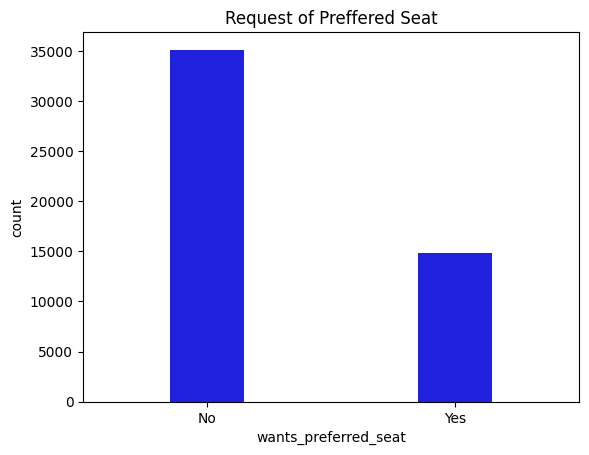

In [54]:
ax = sns.countplot(data=df, x="wants_preferred_seat", color="blue", width=0.3)
ax.set_title("Request of Preffered Seat")
ax.set_xticks(range(2))
ax.set_xticklabels(["No", "Yes"])
plt.show()

Most of the passengers do not want preffered seat (they choose their own seat)

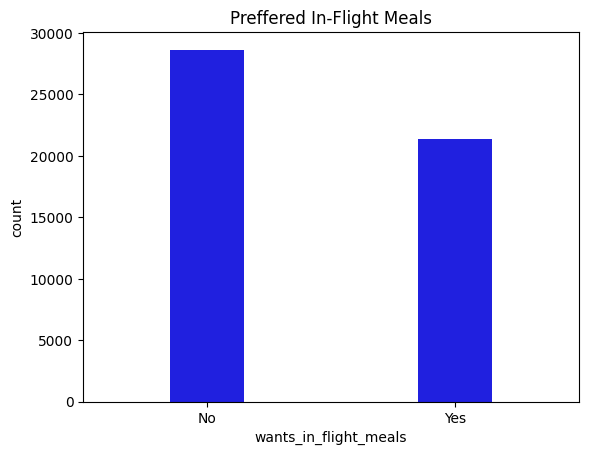

In [53]:
ax = sns.countplot(data=df, x="wants_in_flight_meals", color="blue", width=0.3)
ax.set_title("Preffered In-Flight Meals")
ax.set_xticks(range(2)) 
ax.set_xticklabels(["No", "Yes"])
plt.show()

Most of the passengers do not want in-flight meal

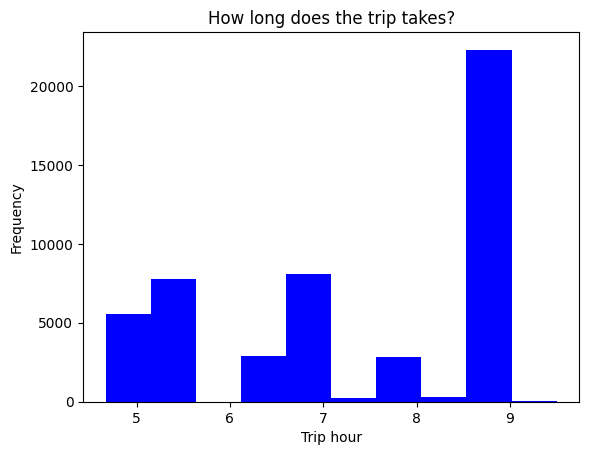

In [64]:
plt.hist(data=df, x="flight_duration", color="blue") 
plt.title("How long does the trip takes?");
plt.ylabel("Frequency")
plt.xlabel("Trip hour");

Most of the flight are around 9 hours long

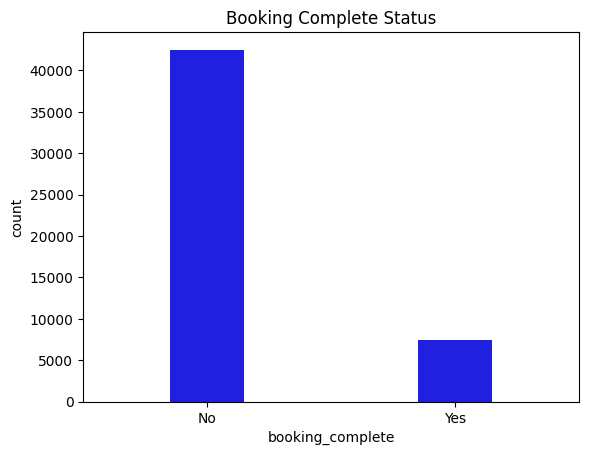

In [51]:
ax = sns.countplot(data=df, x="booking_complete", color="blue", width=0.3) 
ax.set_title("Booking Complete Status")
ax.set_xticks(range(2))
ax.set_xticklabels(["No", "Yes"])
plt.show()

Most of the booking are not completed (the booking were made)

# Analysis for two or more variables

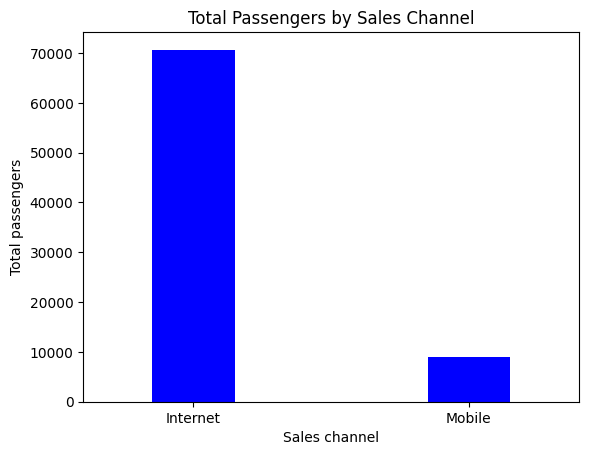

In [63]:
# total passengers for each sales channel
passenger_sales_channel = df[["num_passengers", "sales_channel"]].groupby("sales_channel").sum()
passenger_sales_channel.plot(kind="bar", color="blue", legend=False, width=0.3)
plt.xticks(rotation=0)
plt.title("Total Passengers by Sales Channel") 
plt.xlabel("Sales channel")
plt.ylabel("Total passengers")
plt.show() 

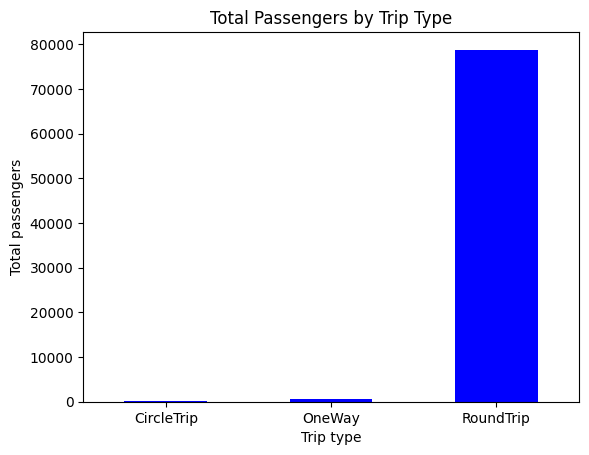

In [61]:
# total passengers for each trip type
passenger_trip_type = df[["num_passengers", "trip_type"]].groupby("trip_type").sum()
passenger_trip_type.plot(kind="bar", color="blue", legend=False)
plt.xticks(rotation=0)
plt.title("Total Passengers by Trip Type") 
plt.xlabel("Trip type")
plt.ylabel("Total passengers")
plt.show() 

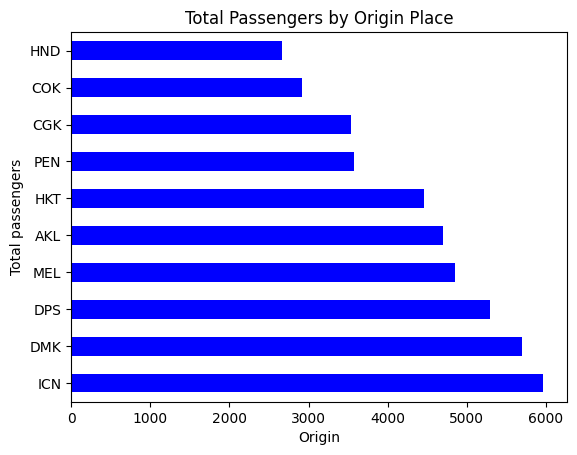

In [62]:
# top 10 origin by total passengers 
passenger_orig = df[["num_passengers", "orig_flight"]].groupby("orig_flight").sum()
passenger_orig.nlargest(10, "num_passengers").plot(kind="barh", color="blue", legend=False)
plt.xticks(rotation=0)
plt.title("Total Passengers by Origin Place") 
plt.xlabel("Origin")
plt.ylabel("Total passengers")
plt.show()

Most of the passengers fly from ICN Airport (South Korea)

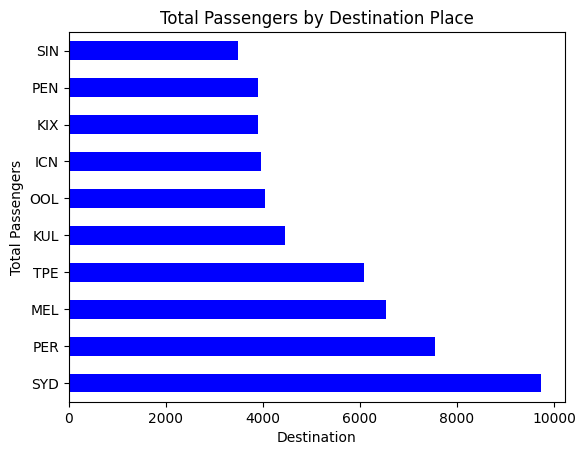

In [27]:
# top 10 destination by total passengers 
passenger_dest = df[["num_passengers", "dest_flight"]].groupby("dest_flight").sum()
passenger_dest.nlargest(10, "num_passengers").plot(kind="barh", color="blue", legend=False)
plt.xticks(rotation=0)
plt.title("Total Passengers by Destination Place") 
plt.xlabel("Destination")
plt.ylabel("Total Passengers")
plt.show()

Most of the passengers fly to SYD Airport (Australia)

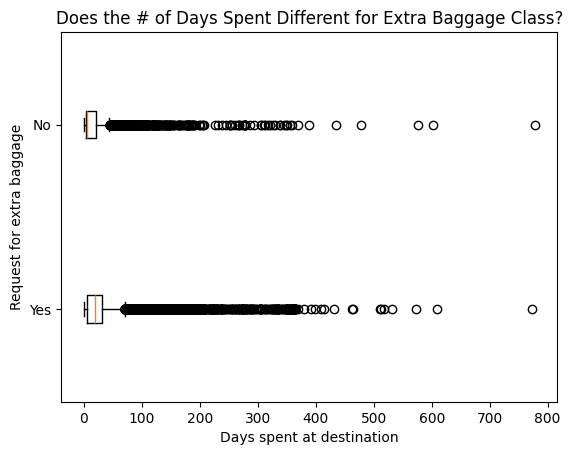

In [59]:
# histogram of length of stay for extra baggae category 
extrabaggae_lengthstay = df.query("wants_extra_baggage == 1")["length_of_stay"]
noextrabaggae_lengthstay = df.query("wants_extra_baggage == 0")["length_of_stay"] 

# boxplot for two categories
fig, ax = plt.subplots()
ax.boxplot([extrabaggae_lengthstay, noextrabaggae_lengthstay], labels=["Yes", "No"], vert=False)
ax.set_xlabel("Days spent at destination")
ax.set_ylabel("Request for extra baggage")
ax.set_title("Does the # of Days Spent Different for Extra Baggage Class?")
plt.show()

From the boxplots, the passengers who request for extra baggage stays longer at the destination than passengers who don't

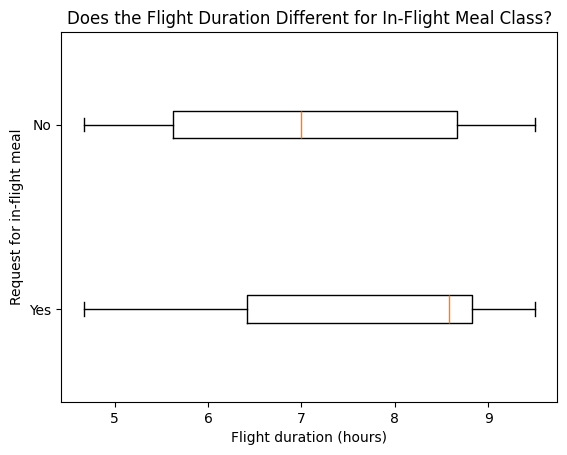

In [60]:
# histogram of flight duration for in-flight meal category 
inflightmeal_flightduration = df.query("wants_in_flight_meals == 1")["flight_duration"]
noninflightmeal_flightduration = df.query("wants_in_flight_meals == 0")["flight_duration"] 

# boxplot for two categories
fig, ax = plt.subplots()
ax.boxplot([inflightmeal_flightduration, noninflightmeal_flightduration], labels=["Yes", "No"], vert=False)
ax.set_xlabel("Flight duration (hours)")
ax.set_ylabel("Request for in-flight meal")
ax.set_title("Does the Flight Duration Different for In-Flight Meal Class?")
plt.show()

The flight duration for passengers who wants in-flight meals are longer than passengers who don't want in-flight meals